Haris Prananditya_TimeSeries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving submission3_haris (1).csv to submission3_haris (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('submission3_haris (1).csv')

data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import seaborn as sns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      1000 non-null   object
 1   postcode      1000 non-null   int64 
 2   price         1000 non-null   int64 
 3   propertyType  1000 non-null   object
 4   bedrooms      1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
data = data.astype({"price": int, "price": float})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      1000 non-null   object 
 1   postcode      1000 non-null   int64  
 2   price         1000 non-null   float64
 3   propertyType  1000 non-null   object 
 4   bedrooms      1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
data.isna().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [ ]:
data.describe()

,postcode,price,bedrooms
count,1000.000000,1.000000e+03,1000.000000
mean,2751.061000,5.049960e+05,3.479000
std,148.524978,2.070529e+05,0.691402
min,2600.000000,1.000000e+05,1.000000
25%,2611.000000,3.845000e+05,3.000000
50%,2617.000000,4.550000e+05,3.000000
75%,2905.000000,5.646250e+05,4.000000
max,2914.000000,3.500000e+06,5.000000


In [ ]:
## MEAN TEMP 
dates = data['datesold'].values
harga = data['price'].values

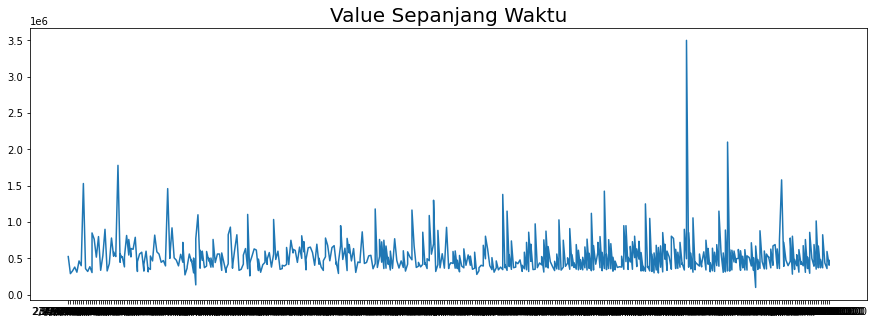

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(dates, harga)
plt.title('Value Sepanjang Waktu',
          fontsize=20);

In [ ]:
temp_train = data.iloc[:,2:3]
temp_test = data.iloc[:,2:3]

In [ ]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
tanggal= ss.fit_transform(temp_train)
harga= ss.fit_transform(temp_test)

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dates, harga, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

800 200


In [ ]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
x_test = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [ ]:
from keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True, input_shape = (trainX.shape[1], 1)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(24, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.10):
      print('\n MAE SUDAH BERADA DIBAWAH 10%')
      self.model.stop_training = True
callbacks = myCallback()
history = model.fit(x_train, x_test,epochs=25, validation_data=(x_train, x_test), batch_size = 1000, callbacks=[callbacks])

Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 0.0090 - mae: 0.1192 - val_loss: 0.0090 - val_mae: 0.1192
Epoch 2/25
1/1 [==============================] - 0s 61ms/step - loss: 0.0090 - mae: 0.1192 - val_loss: 0.0090 - val_mae: 0.1191
Epoch 3/25
1/1 [==============================] - 0s 50ms/step - loss: 0.0090 - mae: 0.1191 - val_loss: 0.0089 - val_mae: 0.1191
Epoch 4/25
1/1 [==============================] - 0s 51ms/step - loss: 0.0089 - mae: 0.1191 - val_loss: 0.0089 - val_mae: 0.1190
Epoch 5/25
1/1 [==============================] - 0s 48ms/step - loss: 0.0089 - mae: 0.1190 - val_loss: 0.0089 - val_mae: 0.1190
Epoch 6/25
1/1 [==============================] - 0s 49ms/step - loss: 0.0089 - mae: 0.1190 - val_loss: 0.0089 - val_mae: 0.1189
Epoch 7/25
1/1 [==============================] - 0s 58ms/step - loss: 0.0089 - mae: 0.1189 - val_loss: 0.0089 - val_mae: 0.1188
Epoch 8/25
1/1 [==============================] - 0s 53ms/step - loss: 0.0089 - mae: 0.1188 - val_l

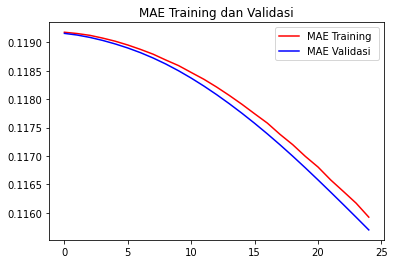

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   
mae = history.history['mae']                                                 
val_mae = history.history['val_mae']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                           

epochs = range(len(mae))                                                       

plt.plot(epochs, mae, 'r', label='MAE Training ')                                               
plt.plot(epochs, val_mae, 'b', label='MAE Validasi')                          
plt.title('MAE Training dan Validasi')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

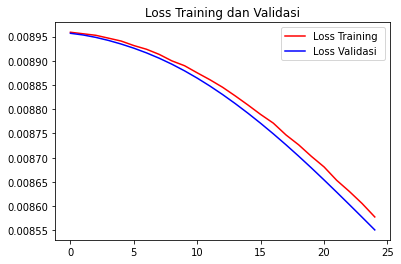

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Loss Training ')                                               
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                          
plt.title('Loss Training dan Validasi')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()